#### Logistic Regression

In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# to make this notebook's output stable across runs
np.random.seed(47)

train1 = pd.read_csv("train1-02.csv")
train1.head()

,X..language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,10.22470,-5.84695,1.579330,11.07320,-6.74006,13.6003,-8.34855,4.25603,-1.076250,-7.46205,4.02494,-0.636634
1,0,4.89987,-4.39598,0.450237,6.70707,-6.72603,10.3793,-9.64491,4.25752,-0.784425,-5.47746,2.21494,-7.412240
2,0,2.91494,-4.19126,3.497830,10.37480,-6.31339,10.0329,-10.61860,4.82322,1.174930,-3.97906,1.87674,-4.466670
3,0,4.88026,-6.57269,2.147220,9.64465,-6.49599,10.6034,-9.64661,1.90916,-0.186767,-4.03675,3.21464,-5.445380
4,1,7.07797,-7.26548,9.474140,9.06840,-8.41768,12.1046,-13.27290,3.46233,-1.225250,-5.04044,2.29165,-5.847240


In [11]:
# Training data
X = train1.drop(["X..language"],1)
y = np.c_[train1["X..language"]]

In [5]:
# Fit model
np.random.seed(47)
log_reg = LogisticRegression(solver="lbfgs")
model1 = log_reg.fit(X, y.ravel())

In [7]:
y_pred = model1.predict(X)

In [8]:
# Training accuracy
print(accuracy_score(y, y_pred)*100)

100.0


In [9]:
confusion_matrix(y_pred,y)

array([[20,  0],
       [ 0, 20]])

In [14]:
# Testing data
test1 = pd.read_csv("test1-02.csv")
labels = pd.read_csv("labels1-02.csv")
test1.head()

,X..X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,10.557100,-7.303100,0.008080,13.65330,-4.46331,12.46410,-9.81588,1.87356,-1.345830,-8.63407,5.302520,-5.30560
1,4.520500,-3.951550,0.195947,9.19618,-6.31148,9.14480,-8.80409,4.87974,-1.010500,-2.97694,3.927430,-7.16815
2,-2.595750,-2.466700,0.420945,5.33781,-5.52346,9.90535,-10.12440,4.74850,-0.090000,-1.66329,-0.500254,-5.02942
3,5.213080,-8.050840,3.173940,8.01995,-7.03389,10.34740,-11.54210,3.36007,1.265040,-2.32166,0.821799,-6.95201
4,-0.458483,-0.811747,-3.077300,5.90479,-6.85130,8.41783,-8.78810,4.62265,-0.977714,-2.06965,2.230090,-5.59135


In [15]:
# Predict
np.random.seed(45)
y_pred_test = model1.predict(test1)
y_pred_test

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [28]:
# Testing accuracy
print(accuracy_score(labels, y_pred_test)*100)

100.0


In [29]:
confusion_matrix(y_pred_1,labels)

array([[9, 0],
       [0, 9]])

The training data set “train1-02.csv” was used to create a logistic regression model in order to classify examples from speakers for two different languages. The data set consists of 40 observations of speakers, and 13 variables. There are 12 predictor variables labelled from “X1” to “X12”, and a categorical target variable “X..language” with values 0 and 1 representing  one of the two different languages respectively. 

The target variable “X..language” was removed from the data frame so that only the 12 predictor variables remained to be assigned to a new variable “X”. The “X..language” variable was assigned to variable “y”. The sklearn classification algorithm LogisticRegression was used to fit a logistic regression model to the training data. The proportion of correct predictions, or the training accuracy for the model, was 100%. A confusion matrix showed that there were zero misclassifications, with classifications distributed evenly between the two classes (20 observations in each class). 

The test data set was the applied to the trained model, and the predicted values were computed. A comparison with the true test outcomes revealed the test accuracy to also be 100%, with no misclassifications and observations spread evenly between classes.
The code was checked to verify that such a high test accuracy was not the result of 
data leakage, or accidently using data from the training set when testing the model, leading other causes for this result to be considered. From examining the training and test sets, it can be seen that both are very similar, which may have led the testing data to perform at a similar level to the training data. 

Although the training and test accuracy are extremely high, this does not necessarily mean that the model may be considered good. As previously mentioned, the test accuracy result may be due similarity between training testing data, or the small size of the testing data set. As the training accuracy was shown to be 100%, there is a possibility that the model has overfit. As such, it cannot be guaranteed the model would generalise well to different data.

#### Replacing Missing Values

In [16]:
# Training data
train2 = pd.read_csv("train2-01.csv")
train2.head()

,X..language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,6,7.56899,-3.341920,7.095370,14.11000,-3.25970,13.4015,-5.29880,7.44277,2.96299,0.265848,4.14782,-5.72775
1,6,7.66209,-0.809953,3.337540,NaN,-3.16989,12.2864,-5.66250,8.02133,2.13109,0.164655,7.06902,-4.02656
2,6,5.20720,0.316089,2.299860,11.19260,NaN,NaN,-6.56881,10.26090,2.60361,NaN,7.39893,2.35551
3,6,2.68311,2.329850,0.064298,9.04638,-3.70971,11.5594,-5.64650,7.76425,2.16388,1.071940,NaN,-2.44976
4,6,0.54584,0.674888,NaN,8.47940,-2.38186,13.0469,-6.98280,7.89009,3.05159,1.478300,2.64134,NaN


In [17]:
# Number of missing values
train2.isnull().sum().sum()

43

In [18]:
np.random.seed(47)
#replace missing values with k nearest neighbours imputation
#takes average of k nearest neighbours to missing values
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5)
train2_impute = imputer.fit_transform(train2)
train2_impute = pd.DataFrame(train2_impute) #dataframe
train2_impute.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6.0,7.56899,-3.341920,7.095370,14.11000,-3.259700,13.40150,-5.29880,7.44277,2.96299,0.265848,4.147820,-5.727750
1,6.0,7.66209,-0.809953,3.337540,10.49096,-3.169890,12.28640,-5.66250,8.02133,2.13109,0.164655,7.069020,-4.026560
2,6.0,5.20720,0.316089,2.299860,11.19260,-1.689422,11.97976,-6.56881,10.26090,2.60361,-0.853989,7.398930,2.355510
3,6.0,2.68311,2.329850,0.064298,9.04638,-3.709710,11.55940,-5.64650,7.76425,2.16388,1.071940,4.893598,-2.449760
4,6.0,0.54584,0.674888,3.856960,8.47940,-2.381860,13.04690,-6.98280,7.89009,3.05159,1.478300,2.641340,-1.941457


In [19]:
X2 = train2_impute.drop([0],1)
y2 = np.c_[train2_impute[0]]
np.unique(y2) #class labels

array([6., 7.])

In [22]:
# Fit model
np.random.seed(47)
model2 = log_reg.fit(X2, y2.ravel())

In [23]:
# Training accuracy
y_pred_train2 = model2.predict(X2) 
print(accuracy_score(y2, y_pred_train2)*100)

100.0


In [24]:
confusion_matrix(y_pred_train2,y2) #training

array([[20,  0],
       [ 0, 20]])

In [25]:
# Testing data
test2 = pd.read_csv("test2-01.csv")
test2.head()

,X..X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,NaN,0.27083,3.543050,12.43500,-3.073420,9.8186,-6.33397,10.93810,1.058550,-7.425450,8.12394,1.579180
1,5.63742,1.26599,5.124260,9.79453,NaN,15.5637,-6.11971,8.27859,3.032970,2.018400,6.50936,1.636920
2,1.12113,4.25289,1.034530,NaN,-0.236166,13.8259,-7.34798,8.32609,NaN,1.437000,6.70727,NaN
3,8.74538,NaN,9.525200,5.86719,-5.589730,15.3742,-5.45422,7.15645,-0.366833,-0.908566,8.50961,-0.574648
4,-2.92624,3.02930,0.316425,10.46540,2.975700,11.1443,-7.69285,9.63877,NaN,-2.554560,NaN,0.370682


In [26]:
#impute missing values in test set
test2_impute = imputer.fit_transform(test2)
test2_impute = pd.DataFrame(test2_impute) #dataframe
test2_impute.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.568688,0.270830,3.543050,12.43500,-3.073420,9.8186,-6.33397,10.93810,1.058550,-7.425450,8.123940,1.579180
1,5.637420,1.265990,5.124260,9.79453,-3.538656,15.5637,-6.11971,8.27859,3.032970,2.018400,6.509360,1.636920
2,1.121130,4.252890,1.034530,10.12011,-0.236166,13.8259,-7.34798,8.32609,2.350500,1.437000,6.707270,0.205466
3,8.745380,0.301451,9.525200,5.86719,-5.589730,15.3742,-5.45422,7.15645,-0.366833,-0.908566,8.509610,-0.574648
4,-2.926240,3.029300,0.316425,10.46540,2.975700,11.1443,-7.69285,9.63877,0.991773,-2.554560,6.866488,0.370682


In [27]:
# Predict
np.random.seed(47)
y_pred_2 = model2.predict(test2_impute)
y_pred_2

array([6., 6., 6., 7., 6., 6., 6., 7., 6., 7., 6., 7., 6., 6., 7., 7., 6.,
       6.])

The training data set “train2-01.csv” was used to create a logistic regression model to classify examples from speakers as belonging to one of two different language classes, similarly to question 1. The training data set consists of 12 predictor variables and one categorical target variable containing two values 6 and 7 as the labels for the two language classes. 

The training data set also contains 42 missing values, meaning that the data required pre-processing before a model could be built. The method of dealing with missing data by removing such instances was considered, however this approach would be detrimental here as the data set is very small, containing only 40 observations and 12 columns. Such an approach may lead to a significant loss of important information in the data. Imputation as a method of dealing with missing data was selected, whereby information from predictors in the training set is used to estimate the values of missing data. Replacing the missing values with the average of their corresponding columns was also considered, however such a method of imputation may be inaccurate as outliers can significantly influence the computed values. 

Thus, a method of imputation using a K- nearest neighbours approach was chosen. With this method, a missing value is replaced by taking the average of its  k- nearest samples. This has the advantage of keeping imputed missing values within appropriate range of the values in the training data. The KNNImputer class from sklearn was used to carry out this method of missing value imputation and to create a new training set upon which the regression model could be built on.

The sklearn classification algorithm LogisticRegression was used to fit a logistic regression model to the new training set with replaced missing values. The resulting proportion of correct class predictions was 100%, with no misclassifications and speaker example observations distributed evenly between the two language classes. 
The test data set also contained missing values, and the same K- nearest neighbours approach was used for imputation. This new test set was then applied to the logistic regression model and the predicted test outputs were computed. 

As the training accuracy of the model was 100%, this may indicate that overfitting has occurred. As such, the performance of the model on the test data cannot be guaranteed to perform well as the model may not generalise well to unseen data. 


#### Support Vector Classifier

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [29]:
# Training data
train3 = pd.read_csv("train3-125.csv")
train3.head()

,X..language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,9.9178,5.08356,18.3282,13.6834,7.40002,27.6248,1.829200,24.5021,15.9707,-0.048114,17.7645,-1.623060
1,2,16.2788,4.45568,16.0435,19.9961,7.67195,26.0439,4.007120,26.4307,18.8938,-6.861160,17.1780,0.309046
2,5,17.9197,-1.49624,19.2557,19.2635,3.25510,24.1119,6.860250,21.5101,17.3434,-1.831600,19.7689,4.626680
3,2,16.7873,2.47533,24.7522,20.0013,5.18935,27.8916,0.734509,24.9686,18.9031,-2.969510,15.7605,-1.101710
4,1,10.7314,7.43060,18.2488,15.4827,7.63276,25.2403,0.167220,24.2909,18.7210,-0.321854,16.5543,-4.162160


In [31]:
X3 = train3.drop(["X..language"],1)
y3 = np.c_[train3["X..language"]]
np.unique(y3) # classes

array([1, 2, 5])

In [32]:
# Testing data
test3 = pd.read_csv("test3-125.csv")
test3.head()

,X..X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,15.54980,3.62534,27.8057,9.10427,20.12290,18.1854,8.94644,21.9994,10.0720,13.466200,4.97376,6.16664
1,21.74460,-1.93853,19.0690,23.79500,7.99254,30.3174,4.34176,18.3023,19.6996,-7.990290,19.38110,5.12450
2,13.83680,2.67344,23.4723,18.84740,7.22676,28.6772,1.68494,22.4163,18.1935,-0.644812,16.15120,-1.81631
3,8.94236,7.48171,14.4068,14.22270,8.51825,26.4827,3.30106,23.5244,19.2834,0.932259,16.40540,1.71311
4,13.26000,3.19063,19.7457,14.55730,8.14645,29.6702,3.13715,20.7950,19.5352,1.852130,19.15230,3.14633


In [33]:
# Scaling
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)
test3_scaled = scaler.fit_transform(X3)

C = 0.01, accuracy = 98.52941176470588
C = 0.1, accuracy = 98.52941176470588
C = 1, accuracy = 98.52941176470588
C = 10, accuracy = 98.52941176470588
C = 100, accuracy = 98.52941176470588


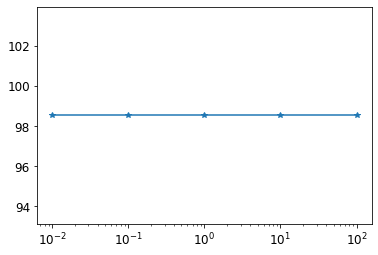

In [37]:
Margins = [0.01, 0.1, 1, 10, 100]

resAccuracy = []
for m in Margins:
    svm_clf_cv = SVC(kernel="rbf", gamma='scale', C=1, max_iter=1e4)   # using iter=1e4
    svm_clf_cv.fit(X3_scaled,y3.ravel())
    y_pred = svm_clf_cv.predict(X3_scaled)
    accCurr = accuracy_score(y3.ravel(), y_pred)*100
    print(f'C = {m}, accuracy = {accCurr}')
    resAccuracy.append(accCurr)
    
plt.figure(figsize=(6,4))
plt.semilogx(Margins, resAccuracy, '*-')
plt.show()

In [39]:
# Fit model
np.random.seed(52)
svm_clf3 = SVC(kernel="rbf", gamma='scale', C=1, max_iter=1e4)
model3_scaled = svm_clf3.fit(X3_scaled,y3.ravel())
#training error
y3_pred_scaled = model3_scaled.predict(X3_scaled)
accuracy_score(y3, y3_pred_scaled) * 100

98.52941176470588

In [40]:
confusion_matrix(y3_pred_scaled, y3) #1 missclassfication

array([[20,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 27]])

In [41]:
#test predictions
y3_test_pred = svm_clf3.predict(test3_scaled)
y3_test_pred

array([1, 2, 5, 2, 1, 5, 5, 2, 5, 1, 5, 2, 1, 1, 5, 2, 5, 5, 2, 1, 5, 5,
       5, 5, 2, 1, 5, 2, 5, 5, 1, 1, 5, 2, 5, 1, 1, 5, 2, 5, 2, 1, 5, 2,
       1, 2, 5, 1, 1, 2, 5, 2, 5, 2, 5, 5, 1, 2, 1, 1, 1, 2, 5, 2, 5, 1,
       2, 2])

In [42]:
unique, counts = np.unique(y3_test_pred, return_counts=True)
dict(zip(unique, counts)) #how many in each predicted class

{1: 20, 2: 21, 5: 27}

In [45]:
# Cross- validation and permutation
np.random.seed(53)
svm_clf = SVC(kernel="rbf", gamma='scale', C=1, max_iter=1e4)
score, permutation_scores, pvalue = permutation_test_score(
    svm_clf, X3_scaled, y3.ravel(), scoring="accuracy", cv=10, n_permutations=100, n_jobs=1)
print("Test accuracy %s (pvalue : %s)" % (score, pvalue))

Test accuracy 0.9428571428571428 (pvalue : 0.009900990099009901)


The training data set “train-3.csv” was used to create a support vector classification model in order to classify speaker examples to one of three different language classes.  The data set consists of 12 predictor variables and one categorical target values with values 1,2 and 5 for each of the classes representing a different language.

The data was scaled using StandardScaler from sklearn, so that the data would have a mean of 0 and standard deviation of 1. Cross-validation was used to determine the best value for the regularisation parameter C, in order to determine a hyperplane that separates the training data into classes with greater accuracy. From the resulting plot, it could be determined that the accuracy remains the same regardless of the margin and the value of C. 

The scaled data was then fit to a support vector machine classifier model with the regularisation parameter set to 1, and the proportion of correct class predictions or training accuracy score was determined to be 98.53%. A confusion matrix showed there to be one misclassification, with the rest of the observations being spread generally evenly among the three language classes, with 20 observations in the first two classes and 27 in the third class. The test data was also scaled and subsequently applied to the support vector classification model to predict the class labels. The predicted class labels for test data were spread relatively evenly across the three language classes, with the distribution being similar to that of the confusion matrix showing the correct classifications for the training data. 

In order to validate that such a model would perform well on test data, 10-fold cross validation was used due to the small sample size, splitting the training data into training and test sets. The significance of the cross-validated test accuracy score was evaluated by permutation, randomising the labels and repeating the classification method 100 times. A p-value is determined which provides an approximation of the probability that the accuracy score would be obtained by chance. This is calculated by determining the percentage of permutations for which the score is greater than the true classification score. In order to carry out this permutation significance testing and cross- validation, the permutation_test_score from sklearn was used. The regularisation parameter C was set to 1 as previously, and the same kernel was used. The test accuracy was determined to be 94.29% and the p-value to be 0.009, suggesting that the model is significant at the 0.01 level. From this it may be inferred that there is a significant relationship between the speaker example predictor variables and the language classes.



#### K-Neighbours Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
# Training data
train4 = pd.read_csv("train3-125.csv") #same data as Q3
X4 = train4.drop(["X..language"],1)
y4 = np.c_[train4["X..language"]]

In [57]:
# testing data
test4 = pd.read_csv("test3-125.csv")

k = 1
k = 3
k = 5
k = 7
k = 9
k = 11


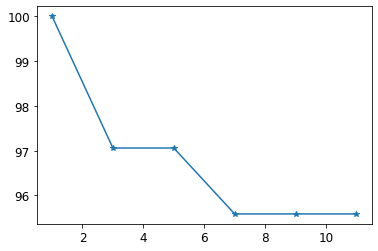

[100.0,
 97.05882352941177,
 97.05882352941177,
 95.58823529411765,
 95.58823529411765,
 95.58823529411765]

In [52]:
# Choosing k value
np.random.seed(53)
k_values = np.arange(1, 12, 2)
results_acc = []

for k in k_values:
    print(f'k = {k}')
    knn_clf = KNeighborsClassifier(n_neighbors=k).fit(X4, y4.ravel())
    y_pred = knn_clf.predict(X4)
    # calculate accuracy
    acc = accuracy_score(y4.ravel(), y_pred)*100
    results_acc.append(acc)

plt.figure
plt.plot(k_values, results_acc, '-*')
plt.show()
results_acc

In [71]:
# Fit model
np.random.seed(32)
knn_clf = KNeighborsClassifier(n_neighbors=2)
model4 = knn_clf.fit(X4, y4.ravel())
y4_pred = model4.predict(X4) 
accuracy_score(y4, y4_pred) * 100 #training accuracy

97.05882352941177

In [64]:
confusion_matrix(y4_pred, y4) #7 missclassifications

array([[20,  0,  1],
       [ 0, 20,  1],
       [ 0,  0, 26]])

In [65]:
np.random.seed(32)
y4_test_pred = model4.predict(test4)
y4_test_pred

array([5, 2, 2, 1, 1, 2, 5, 2, 2, 2, 2, 1, 2, 2, 5, 1, 5, 2, 1, 1, 5, 5,
       5, 5, 1, 1, 2, 1, 5, 5])

In [66]:
unique, counts = np.unique(y4_test_pred, return_counts=True)
dict(zip(unique, counts)) #how many in each class

{1: 9, 2: 11, 5: 10}

In [72]:
# Cross- validation and permutation
np.random.seed(32)
knn_clf = KNeighborsClassifier(n_neighbors=2)
score, permutation_scores, pvalue = permutation_test_score(
    knn_clf, X4, y4.ravel(), scoring="accuracy", cv=10, n_permutations=100, n_jobs=1)
print("Test accuracy score %s (pvalue : %s)" % (score, pvalue))

Test accuracy score 0.9428571428571428 (pvalue : 0.009900990099009901)


The training data set “train-3.csv” was used to create a k- nearest neighbours (KNN) classification model to classify speaker examples as belonging to one of three different languages. The data set contains the same variables as discussed in Question 3.  Cross- validation was used to find the optimal value of k, the number of nearest neighbours. Although k=1 resulted in 100% training accuracy, k=2 was chosen to avoid overfitting the model and to make the model more generalisable. 

The scaled training data was fit to a KNN classification model and the class labels of the training data were predicted. The resulting training accuracy and proportion of correct class predictions was 97.06%, with 2 misclassifications. A confusion matrix showed that the distribution of correct predictions was relatively evenly spread, with 20 observations in the belonging to the first two classes, and 26 to the third class.

The scaled test data was applied to the trained model to predict class labels for the data, with 9 observations predicted to belong to class “1”, 11 to class “2” and 10 to class “5”, indicating a fairly even distribution.

 As above, to evaluate the test accuracy of such a KNN classification model, 10- fold cross validation using the training data. The significance of the classification accuracy score was computed with 100 permutations. The test accuracy was determined to be 94.29% and the p-value to be 0.009, indicating significance the 0.01 level and model performance greater than chance level. It can be seen that the classification accuracy for the k- nearest neighbours classifier is slightly better than for the support vector classifier. Due to the high classification accuracy obtained through cross-validation, as well as its performance better than chance level, the k- nearest neighbours classification model may be considered to be the better approach.
